In [95]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create.


# Read in the data
df = pd.read_csv(r'C:\Users\Bopa\Downloads\movies.csv')

In [96]:
# Next we will set pandas to show us all the rows and look at the data

pd.set_option('display.max_rows', None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [91]:
# Next i'll use a 'for' loop to check each row for missing data.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [53]:
# Evidently we have some null values, so we will remove those now and double check our work.

df = df.dropna(axis=0, how='any')
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [92]:
# Next we will sort the data by highest gross earnings.

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


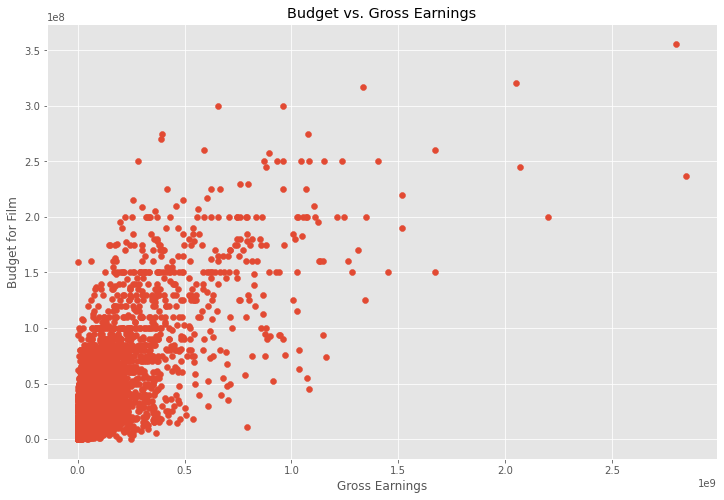

In [73]:
# Let's find out what is correlated to gross revenue. My hypothesis is that the budget, and score are strong positive correlations.

plt.scatter(x=df['gross'], y=df['budget'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

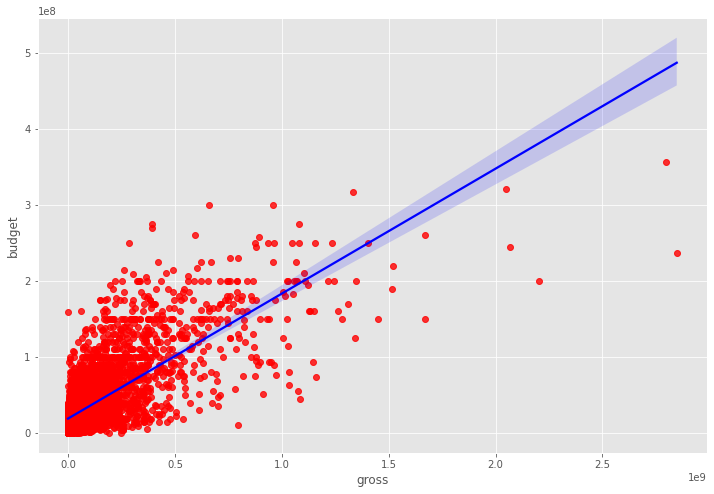

In [70]:
# Plotting the budget vs. gross using seaborn regression.


sns.regplot(x="gross", y='budget', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

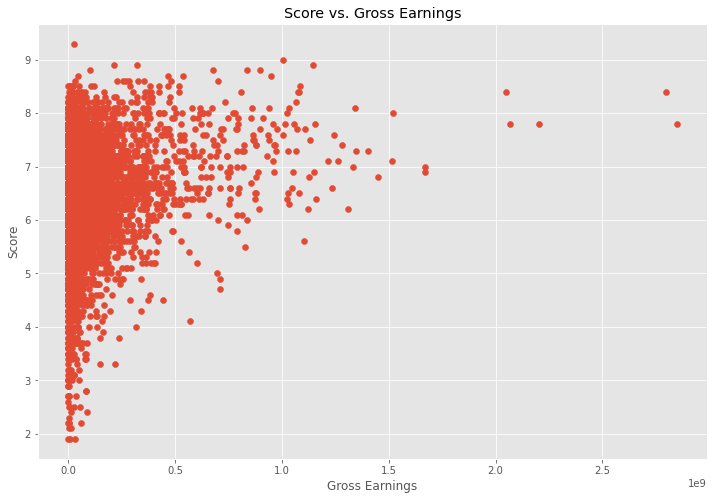

In [71]:
plt.scatter(x=df['gross'], y=df['score'])

plt.title('Score vs. Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Score')

plt.show()

<AxesSubplot:xlabel='gross', ylabel='score'>

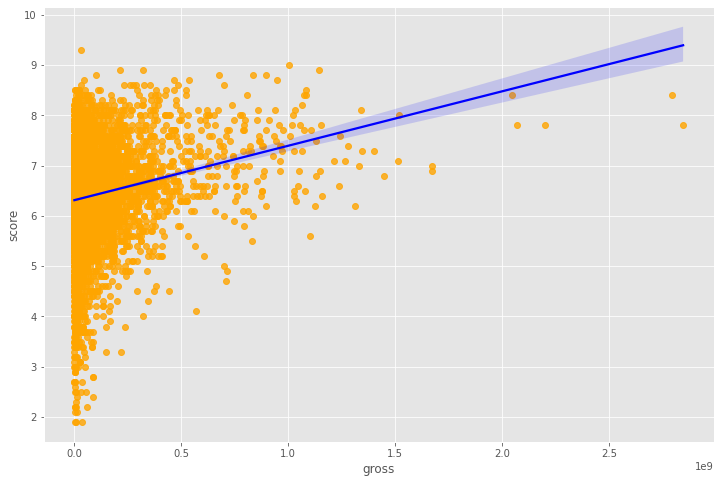

In [72]:
# Plotting the score vs. gross using seaborn regression.


sns.regplot(x="gross", y='score', data=df, scatter_kws={"color": "orange"}, line_kws={"color":"blue"})

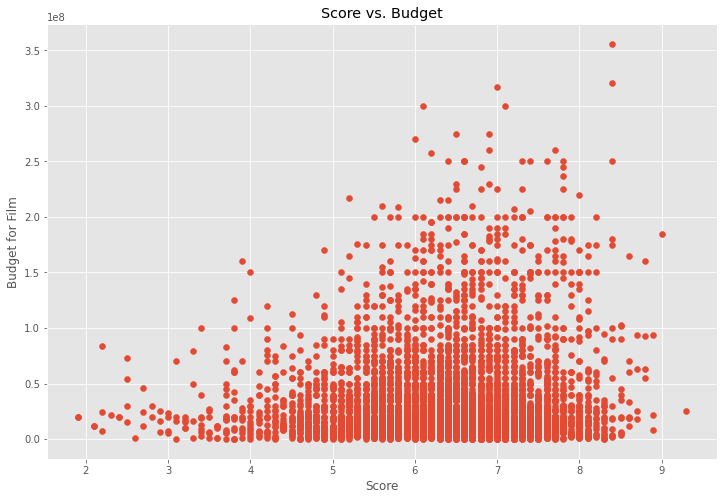

In [74]:
# Lastly let's look how score and budget are correlated. I assume as budget rises, so too does score.

plt.scatter(x=df['score'], y=df['budget'])

plt.title('Score vs. Budget')

plt.xlabel('Score')

plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='score', ylabel='budget'>

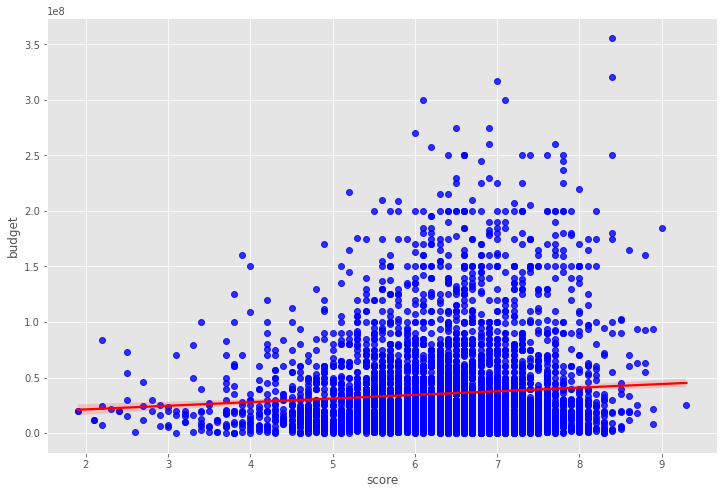

In [76]:
# Plotting the score vs. budget using seaborn regression.


sns.regplot(x="score", y='budget', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"red"})

In [67]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

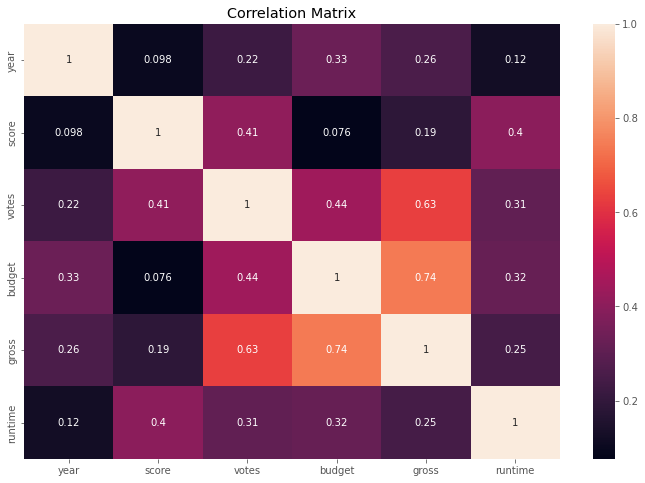

In [78]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show

In [93]:
# Converting strings to categories to use them in correlation matrix.

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
            
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


<function matplotlib.pyplot.show(close=None, block=None)>

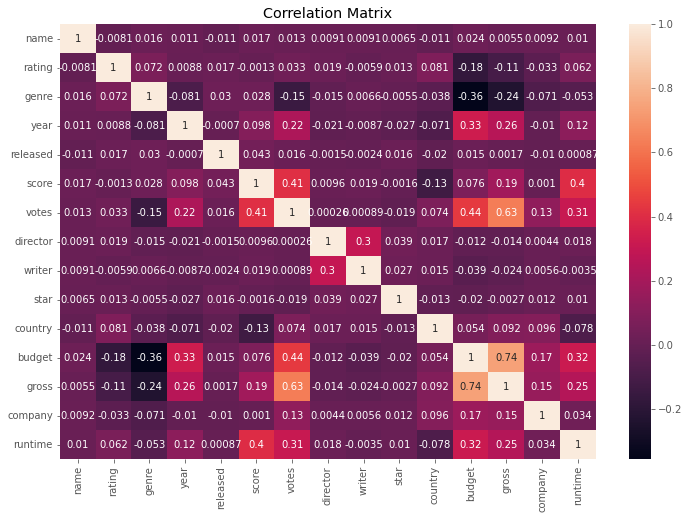

In [82]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show

# Lighter colors and higher numbers means a stronger tendency for two factors to 
# increase or decrease together in the same direction.

In [87]:
# Here's another way to look at it.

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(ascending=False)

s_p = sorted_pairs[(sorted_pairs) < 1]

s_p

gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.630757
gross     votes       0.630757
votes     budget      0.442429
budget    votes       0.442429
score     votes       0.409182
votes     score       0.409182
score     runtime     0.399451
runtime   score       0.399451
year      budget      0.329321
budget    year        0.329321
          runtime     0.320447
runtime   budget      0.320447
          votes       0.309212
votes     runtime     0.309212
director  writer      0.299067
writer    director    0.299067
year      gross       0.257486
gross     year        0.257486
runtime   gross       0.245216
gross     runtime     0.245216
votes     year        0.222945
year      votes       0.222945
score     gross       0.186258
gross     score       0.186258
budget    company     0.173214
company   budget      0.173214
          gross       0.154840
gross     company     0.154840
votes     company     0.133204
company   votes       0.133204
runtime 